In [150]:
# ライブラリにインポート
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

# local
dir_path = './titanic_DefaultData/'

# dir_path = '/content/drive/MyDrive/DataScience/titanic/' # google colab

# 学習データの読み込み
train_df = pd.read_csv(dir_path + "train.csv")

# テストデータの読み込み
test_df = pd.read_csv(dir_path + "test.csv")

# 学習データの先頭5行を確認してみる
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 入っているデータの確認

In [151]:
# テストデータの先頭5行を確認してみる
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [152]:
# データフレームの大きさ
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


## データの特徴の確認、連結

In [153]:
# 学習データとテストデータを連結する
df = pd.concat([train_df, test_df], ignore_index=True)

In [154]:
# 連結したデータの大きさを確認する
df.shape

(1309, 12)

In [155]:
# 最後の5行を確認
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


### データの可視化、Matplotlibで表示する方法

In [156]:
# ①性別ごとにグループ分けして、②各性別ごとにカウントする
df.groupby("Sex").agg({"Sex": "count"})

,Sex
Sex,
female,466
male,843


In [157]:
# 集計結果を変数tmpに格納する
tmp = df.groupby("Sex").agg({"Sex": "count"}).rename(columns={"Sex": "count_sex"})
tmp

,count_sex
Sex,
female,466
male,843


<function matplotlib.pyplot.show(close=None, block=None)>

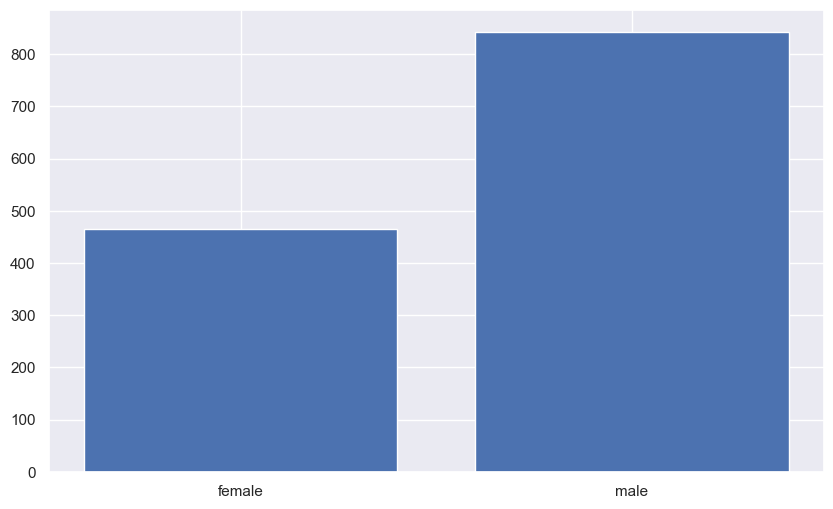

In [158]:
# グラフの大きさを設定
plt.figure(figsize=(10,6))

# 性別の数を確認してみる
plt.bar(tmp.index, tmp.count_sex)
plt.show

#### Pandasで表示する

<Axes: xlabel='Sex'>

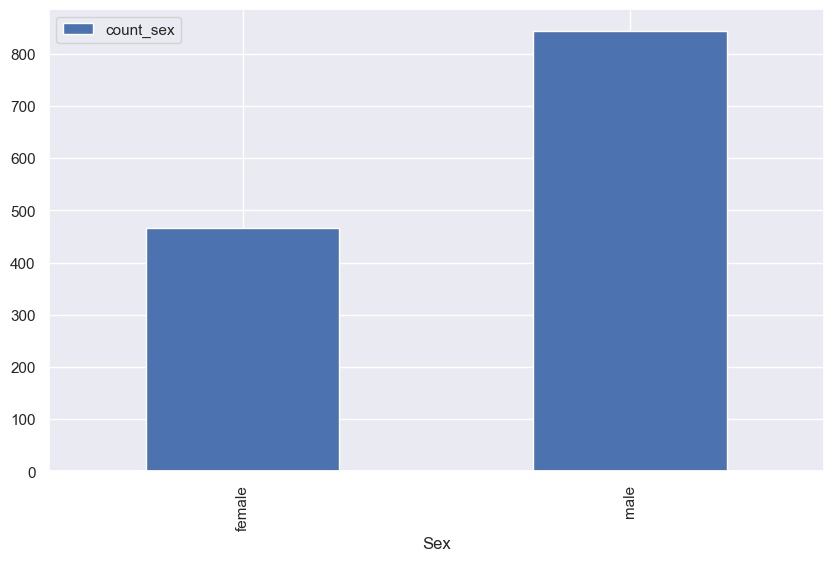

In [159]:
# pandasで棒グラフを作成する
tmp.plot(kind="bar", figsize=(10, 6))

#### Seabornで表示する

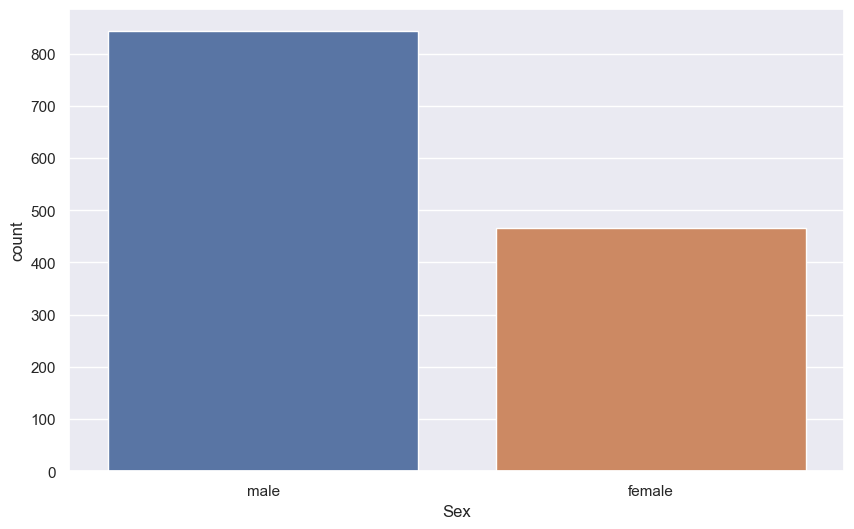

In [160]:
plt.figure(figsize=(10, 6))

# seabornで棒グラフを作成する
sns.countplot(x="Sex", data=df)
plt.show()

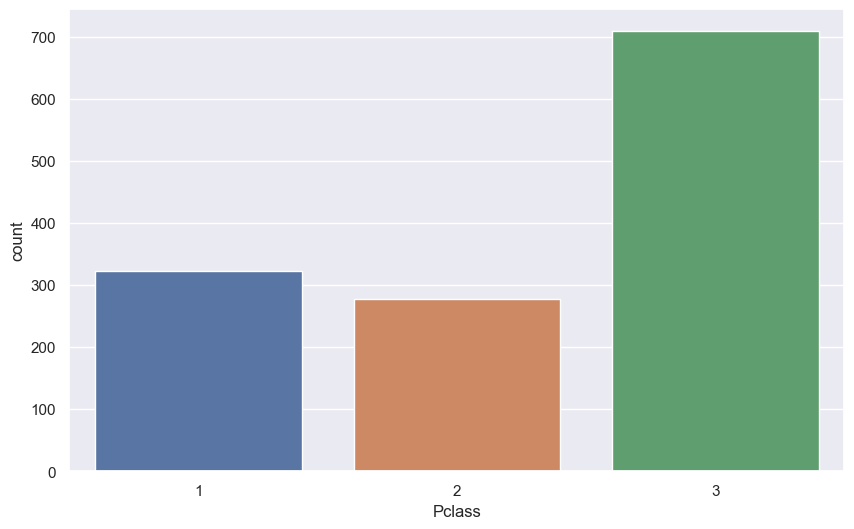

In [161]:
plt.figure(figsize=(10, 6))

# seabornで棒グラフを作成する
sns.countplot(x="Pclass", data=df)
plt.show()

### 欠損値の確認

In [162]:
# データ内の欠損値を確認する
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

## 年齢とタイタニック号に乗った港の欠損値を埋める

In [163]:
# Embarkedの欠損値を確認する
df.Embarked.isnull().sum()

2

<Axes: xlabel='Embarked', ylabel='count'>

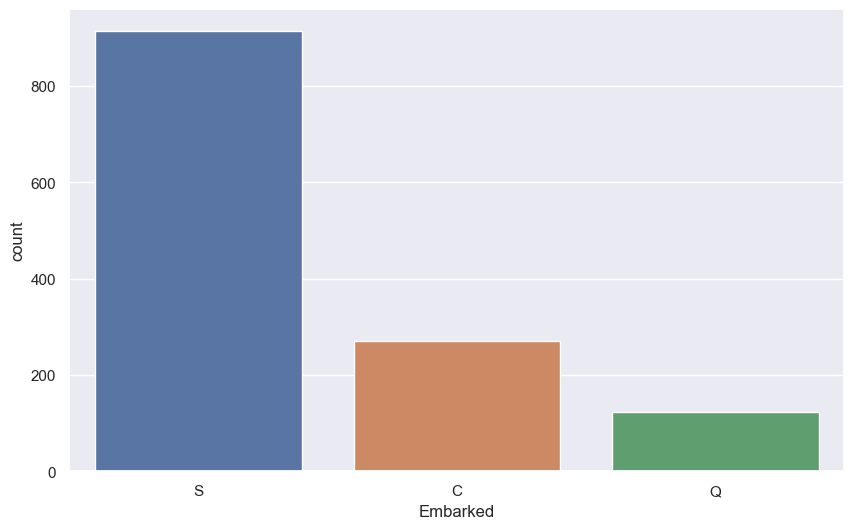

In [164]:
# グラフの大きさを設定
plt.figure(figsize=(10, 6))

# 乗船した港を確認する
sns.countplot(x="Embarked", data=df)

In [165]:
# 元データをコピー
df2 = df.copy()

# 欠損値の補完
df2.Embarked = df2.Embarked.fillna("S")

In [166]:
# 乗船した港の欠損値を再度確認する
df2.Embarked.isnull().sum()

0

In [167]:
# 年齢の最小値と最大値を確認
print(df2.Age.max())
print(df2.Age.min())

80.0
0.17


<Axes: xlabel='Age', ylabel='Count'>

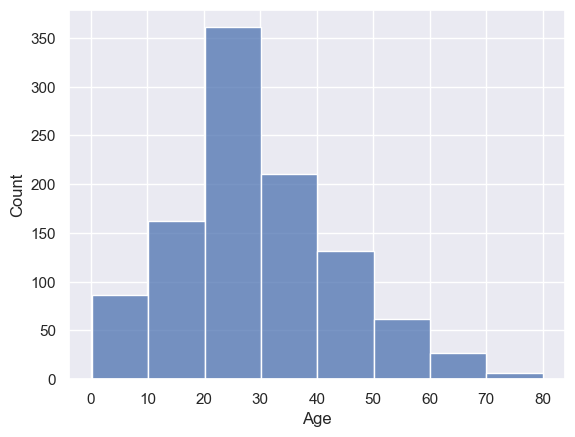

In [168]:
# ヒストグラムを作成する
sns.histplot(x=df.Age, bins=8, kde=False)

In [169]:
# 年齢の平均値と中央値を確認する
print(df2.Age.mean())
print(df2.Age.median())

29.881137667304014
28.0


In [170]:
# df2をコピー
df3 = df2.copy()

# 年齢の中央値を計算
age_median = df3.Age.median()
age_median

28.0

In [171]:
# 年齢の欠損値を、計算しておいた中央値で補完する
df3.Age = df3.Age.fillna(age_median)

In [172]:
# 年齢の欠損値の数を確認する
df3.Age.isnull().sum()

0

## カテゴリカル変数の数値変換、使用するデータの絞り込み

In [173]:
# 今回使わないカラムを削除する
df4 = df3.drop(columns=['Cabin', 'Fare', 'Ticket', 'SibSp', 'Parch', 'Name'])

# 先頭5行を確認する
df4.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked
0,1,0.0,3,male,22.0,S
1,2,1.0,1,female,38.0,C
2,3,1.0,3,female,26.0,S
3,4,1.0,1,female,35.0,S
4,5,0.0,3,male,35.0,S


### カテゴリカル変数1 : 乗船した港の数値変換

In [174]:
# まずはワンホットエンコーディングしてみる
pd.get_dummies(df4["Embarked"])

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
1304,False,False,True
1305,True,False,False
1306,False,False,True
1307,False,False,True


In [175]:
# ワンホットの結果を変数tmp_embarkedに格納する
tmp_embarked = pd.get_dummies(df4['Embarked'], prefix="Embarked")
tmp_embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True


In [176]:
# 元のデータフレームにワンホット結果を連結して、変数df5に格納する
df5 = pd.concat([df4, tmp_embarked], axis=1).drop(columns=["Embarked"])
df5.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,male,22.0,False,False,True
1,2,1.0,1,female,38.0,True,False,False
2,3,1.0,3,female,26.0,False,False,True
3,4,1.0,1,female,35.0,False,False,True
4,5,0.0,3,male,35.0,False,False,True


### カテゴリカル変数の変換2 : 性別

In [177]:
# 性別をワンホットエンコーディングする
pd.get_dummies(df5.Sex).head()

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [178]:
# ラベルエンコーディングした結果を反映する
df5['Sex'] = pd.get_dummies(df5.Sex, drop_first=True)

In [179]:
# データフレームの先頭5行を確認する
df5.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,True,22.0,False,False,True
1,2,1.0,1,False,38.0,True,False,False
2,3,1.0,3,False,26.0,False,False,True
3,4,1.0,1,False,35.0,False,False,True
4,5,0.0,3,True,35.0,False,False,True


## 学習用データとテストデータに分割する

In [180]:
# 学習データに分割した結果を変数trainに格納する
train = df5[~df5.Survived.isnull()]

# テストデータに分割した結果を変数trainに格納する
test = df5[df5.Survived.isnull()]

# テストデータの先頭5行を確認する
test.head()


,PassengerId,Survived,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S
891,892,NaN,3,True,34.5,False,True,False
892,893,NaN,3,False,47.0,False,False,True
893,894,NaN,2,True,62.0,False,True,False
894,895,NaN,3,True,27.0,False,False,True
895,896,NaN,3,False,22.0,False,False,True


In [181]:
# 学習データに分割した結果を変数trainに格納する
train = df5[~df5.Survived.isnull()]

# テストデータに分割した結果を変数trainに格納する
test = df5[df5.Survived.isnull()]

# テストデータの先頭5行を確認する
test.head()


,PassengerId,Survived,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S
891,892,NaN,3,True,34.5,False,True,False
892,893,NaN,3,False,47.0,False,False,True
893,894,NaN,2,True,62.0,False,True,False
894,895,NaN,3,True,27.0,False,False,True
895,896,NaN,3,False,22.0,False,False,True


In [182]:
# Survivedを削除
test = test.drop(columns=["Survived"])
test.head()

,PassengerId,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S
891,892,3,True,34.5,False,True,False
892,893,3,False,47.0,False,False,True
893,894,2,True,62.0,False,True,False
894,895,3,True,27.0,False,False,True
895,896,3,False,22.0,False,False,True


In [183]:
# 正解をy_trainに格納する
y_train = train.Survived

# 特徴量をX_trainに格納する
X_train = train.drop(columns=["Survived"])


In [184]:
# 特徴量を確認
X_train.head()

,PassengerId,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S
0,1,3,True,22.0,False,False,True
1,2,1,False,38.0,True,False,False
2,3,3,False,26.0,False,False,True
3,4,1,False,35.0,False,False,True
4,5,3,True,35.0,False,False,True


In [185]:
# 正解を確認
y_train.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

# 機械学習を使って予測する

In [186]:
# ライブラリのインポート
from sklearn import tree

In [187]:
# 決定木モデルの準備
model = tree.DecisionTreeClassifier()

## モデルの作成

In [188]:
# 決定木モデルの作成
model.fit(X_train, y_train)

DecisionTreeClassifier()

## 作成したモデルを使って予測する

In [189]:
# 作成した決定木モデルを使った予測をおこなう
y_pred = model.predict(test)

In [190]:
# 予測結果の確認をする
y_pred

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [191]:
# テストデータと予測結果の大きさを確認する
len(test), len(y_pred)

(418, 418)

In [192]:
# 予測結果をテストデータに反映する
test.head()
test["Survived"] = y_pred

In [193]:
# テストデータの先頭5行を確認する
test.head()

,PassengerId,Pclass,Sex,Age,Embarked_C,Embarked_Q,Embarked_S,Survived
891,892,3,True,34.5,False,True,False,0.0
892,893,3,False,47.0,False,False,True,0.0
893,894,2,True,62.0,False,True,False,0.0
894,895,3,True,27.0,False,False,True,1.0
895,896,3,False,22.0,False,False,True,0.0


## 予測結果の精度を確認する

In [194]:
# 提出用のデータマートを作成する
pred_df = test[["PassengerId", "Survived"]].set_index("PassengerId")

In [195]:
# 予測結果を整数に変換する
pred_df.Survived = pred_df.Survived.astype(int)
pred_df.Survived.head()

PassengerId
892    0
893    0
894    0
895    1
896    0
Name: Survived, dtype: int32

In [196]:
# CSVの作成
pred_df.to_csv("submission_v1.csv", index_label = ["PassengerId"])